# Solution Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [2]:
import os 
path = os.getcwd()
print(path)

/Users/timothy/NEU Work/ALY6020/Coding Assignments/mod3


# Data Exploratory Analysis

In [3]:
insurance = pd.read_csv('data/insurance.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
num_df = insurance.select_dtypes(include='number')

In [8]:
num_df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [9]:
from scipy.stats import probplot, boxcox
from scipy.special import inv_boxcox
import pylab

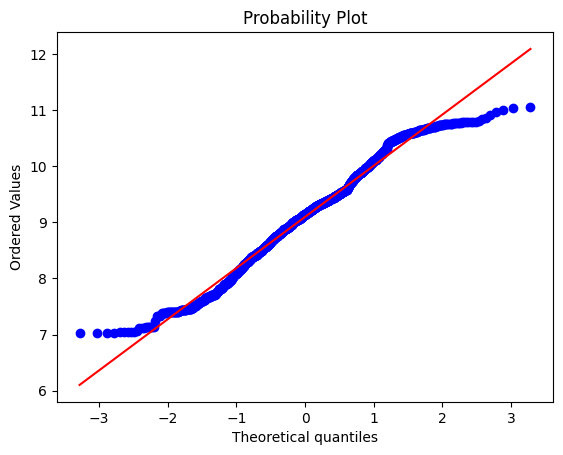

In [114]:


probplot(num_df.charges_log, plot=pylab)
num_df.skew()
num_df['charges_log'] = np.log(num_df['charges'])

age            0.055673
bmi            0.284047
children       0.938380
charges        1.515880
charges_log   -0.090098
charges_rec    1.876806
dtype: float64

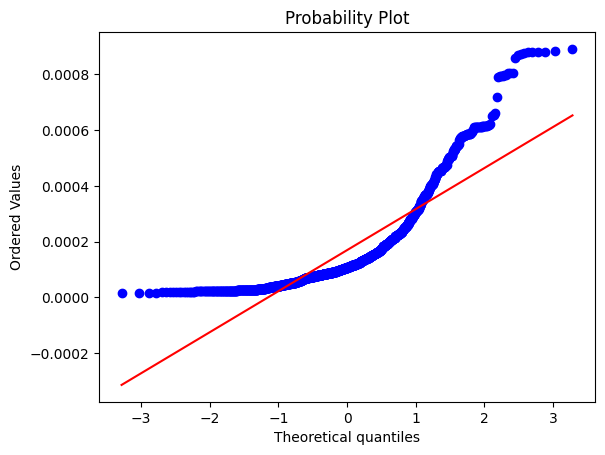

In [11]:
num_df['charges_rec'] = 1/num_df['charges']
probplot(num_df.charges_rec, plot=pylab)
num_df.skew()

age             0.055673
bmi             0.284047
children        0.938380
charges         1.515880
charges_log    -0.090098
charges_rec     1.876806
charges_sqrt    0.795863
dtype: float64

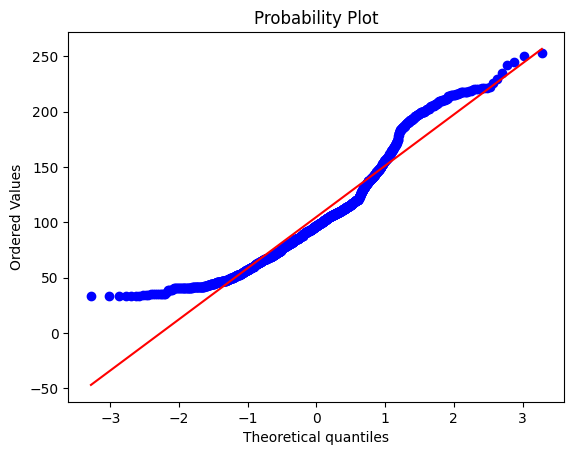

In [12]:
num_df['charges_sqrt'] = np.sqrt(num_df['charges'])
probplot(num_df.charges_sqrt, plot=pylab)
num_df.skew()

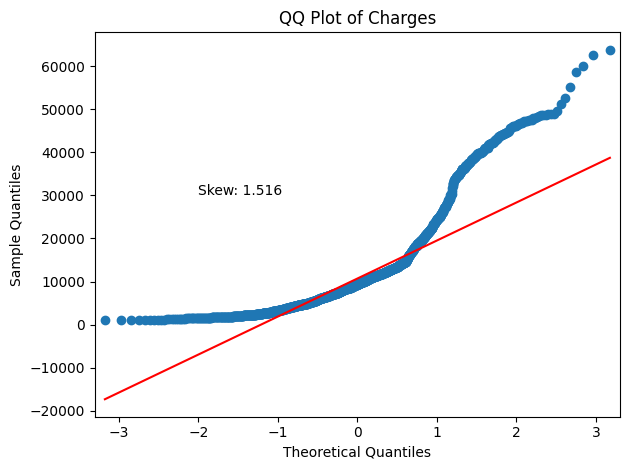

In [13]:
ax = plt.subplot()

sm.qqplot(insurance['charges'], line='q', ax=ax);
ax.set_title('QQ Plot of Charges')
ax.annotate(f"Skew: {round(num_df.skew()['charges'],3)}", xy=(-2,30000))
plt.tight_layout()
plt.show()

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif
X = insurance.select_dtypes(include='number').iloc[:,:-1]
calc_vif(X)

,variable,VIF
0,age,7.536550
1,bmi,7.846515
2,children,1.796637


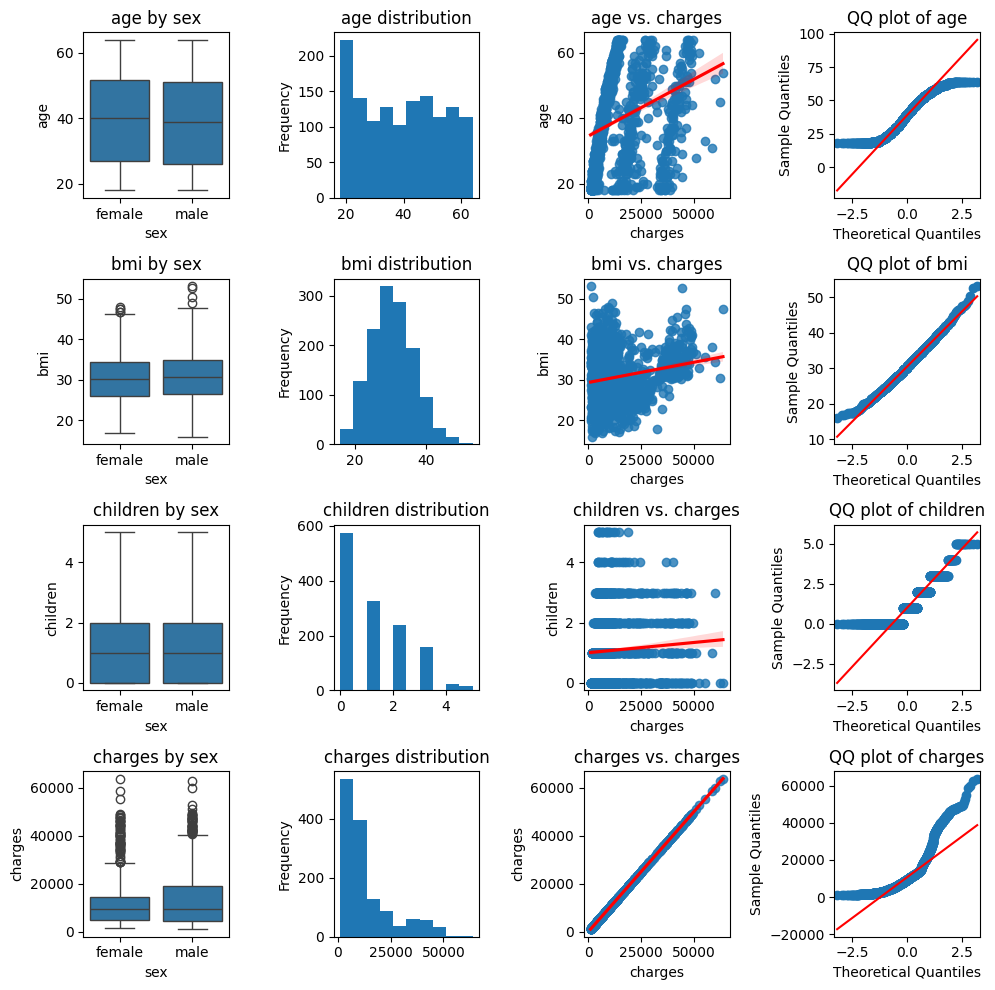

In [14]:
def diagnostic_plots(df, target):
    num_df = df.select_dtypes(include='number')
    fig, axs = plt.subplots(ncols=4, nrows=len(num_df.columns), figsize=(10,10))
    row = 0
    for col in num_df:
        # if col==target:
        #     continue
        
        sns.boxplot(num_df, x=df['sex'], y=col, ax=axs[row,0])
        axs[row,0].set_title(f'{col} by sex')
        
        num_df[col].plot(kind='hist',ax=axs[row,1])
        axs[row,1].set_title(f'{col} distribution')

        sns.regplot(y=num_df[col], x=num_df[target], ax=axs[row,2], line_kws={'color':'red'})
        axs[row,2].set_title(f'{col} vs. {target}')

        sm.qqplot(num_df[col], line='q', ax=axs[row, 3])
        axs[row,3].set_title(f'QQ plot of {col}')

        row += 1
    plt.tight_layout()
    plt.show()
    
                     
diagnostic_plots(insurance, target='charges')


<Axes: ylabel='charges'>

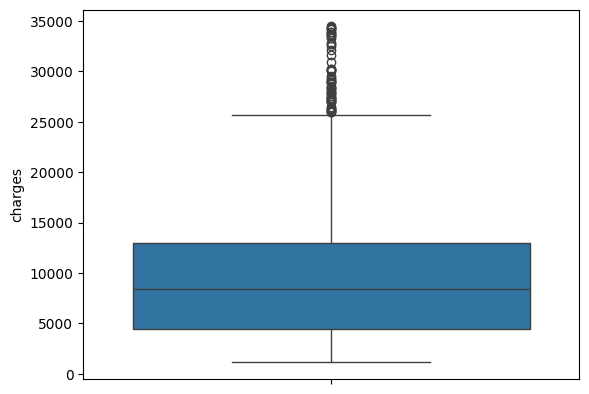

In [138]:
sns.boxplot(y=insurance['charges'])

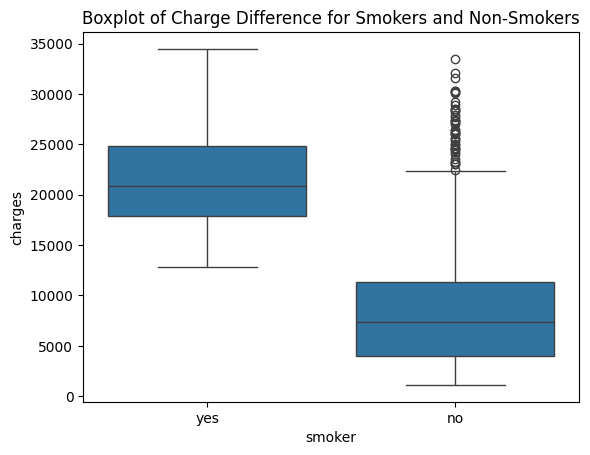

In [128]:
sns.boxplot(x=insurance['smoker'],y=insurance['charges'])
plt.title('Boxplot of Charge Difference for Smokers and Non-Smokers')
plt.show()

# Data Transformation Begins Here

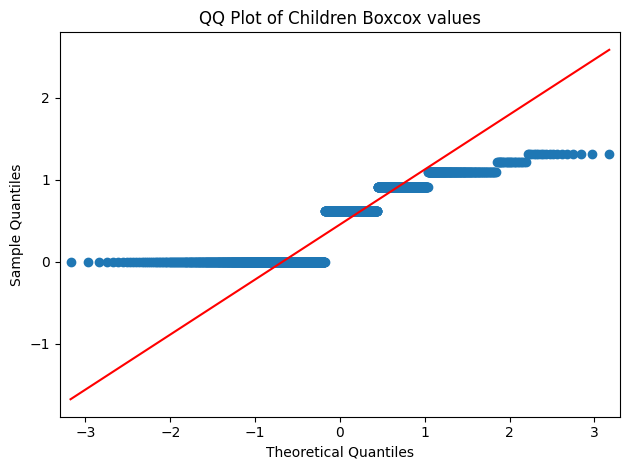

In [149]:
# Fixing children positive skew
insurance = pd.read_csv('data/insurance.csv')
insurance_original = insurance.copy()
insurance['children_plus_one'] = insurance['children'] + 1
insurance['children_boxcox'],children_fitted_lambda = boxcox(insurance['children_plus_one'])
ax = plt.subplot()

sm.qqplot(insurance['children_boxcox'], line='q', ax=ax);
ax.set_title('QQ Plot of Children Boxcox values')
ax.annotate(f"Skew: {round(insurance.select_dtypes(include='number').skew()['children_boxcox'],3)}", xy=(-2,30000))
plt.tight_layout()
plt.show()
insurance.drop(columns=['children', 'children_plus_one'],inplace=True,axis=1)

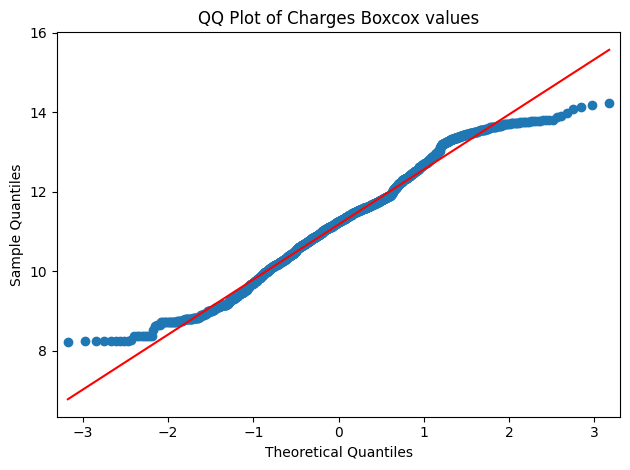

In [150]:
# Fixing charge positive skew
insurance['charges_boxcox'], fitted_lambda = boxcox(insurance['charges'])
ax = plt.subplot()
sm.qqplot(insurance['charges_boxcox'], line='q', ax=ax);
ax.set_title('QQ Plot of Charges Boxcox values')
ax.annotate(f"Skew: {round(insurance.select_dtypes(include='number').skew()['charges_boxcox'],3)}", xy=(-3,30))
plt.tight_layout()
plt.show()

### Remove Outliers

In [148]:


# Remove outliers
def remove_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1 
    lower_bound = q1 - iqr*1.5
    upper_bound = q3 + iqr*1.5
    col[~((col>=lower_bound) & (col<=upper_bound))] = np.nan
    return col

insurance[insurance.select_dtypes(include='number').columns] = insurance.select_dtypes(include='number').apply(remove_outliers)
print(insurance.isnull().sum())
insurance.dropna(how='any',inplace=True)
print('\nAfter dropping values')
print(insurance.isnull().sum())

age                  0
sex                  0
bmi                  9
smoker               0
region               0
charges            139
children_boxcox      0
charges_boxcox       0
dtype: int64

After dropping values
age                0
sex                0
bmi                0
smoker             0
region             0
charges            0
children_boxcox    0
charges_boxcox     0
dtype: int64


In [151]:
# transform categorical data
cat_df = insurance.select_dtypes(include='object')
print(cat_df.head())
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
ohe_transformed = ohe.fit_transform(cat_df)
print(ohe_transformed.head())
# concat dfs 
combined_df = pd.concat([insurance, ohe_transformed], axis=1).drop(columns=cat_df.columns,axis=1)
#combined_df.rename(columns={'charges_boxcox':'charges'},inplace=True)
combined_df.head()


      sex smoker     region
0  female    yes  southwest
1    male     no  southeast
2    male     no  southeast
3    male     no  northwest
4    male     no  northwest
   sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0         1.0       0.0        0.0         1.0               0.0   
1         0.0       1.0        1.0         0.0               0.0   
2         0.0       1.0        1.0         0.0               0.0   
3         0.0       1.0        1.0         0.0               0.0   
4         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0  


,age,bmi,charges,children_boxcox,charges_boxcox,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0.000000,12.128980,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1725.55230,0.612155,8.808597,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,4449.46200,1.087056,10.147521,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,21984.47061,0.000000,12.534951,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,3866.85520,0.000000,9.945637,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


# Linear Regression

In [152]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# combined_df.drop(columns=['region_southeast','region_southwest'],axis=1,inplace=True)

X = combined_df.drop(columns=['charges'],axis=1)
y = combined_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train_with_constant = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)
y_train_boxcox, fitted_lambda =  boxcox(y_train)
y_test_boxcox = boxcox(y_test, lmbda=fitted_lambda)

print(f'{len(X_train)} values used for training data set')
print(f'{len(X_test)} values used for testing data set')

model = sm.OLS(y_train_boxcox, X_train_with_constant).fit()
y_pred_transformed = model.predict(X_test_with_const)

print(model.summary())
y_pred_original_scale = inv_boxcox(y_pred_transformed,fitted_lambda)

1070 values used for training data set
268 values used for testing data set
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.166e+06
Date:                Fri, 07 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:19:22   Log-Likelihood:                 3943.6
No. Observations:                1070   AIC:                            -7867.
Df Residuals:                    1060   BIC:                            -7817.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [153]:
# Calculating accuracy 
mse = mean_squared_error(y_test, y_pred_original_scale)
rmse = np.sqrt(mse)
print('RMSE:',rmse,sep='')

RMSE:97.22183950138728


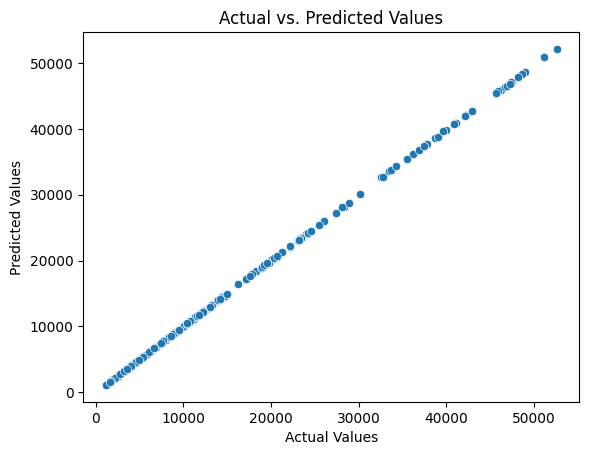

In [145]:

ax = plt.subplot()
sns.scatterplot(x=y_test,y=y_pred_original_scale, ax=ax)
ax.set_title('Actual vs. Predicted Values')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
plt.show()